In [1]:
## Import libraries
import csv
import re
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import requests

In [2]:
# PubMed Website URL
baseURL = 'https://pubmed.ncbi.nlm.nih.gov/?term=%28%22Hemolysis%22%5Btiab%5D+or+%22blood+damage%22%5Btiab%5D%29+AND+%22Medical+Devices%22+%5Btiab%5D+OR+%22hemodialyzers%22%5Btiab%5D&filter=years.2015-2023'
response = requests.get(baseURL)
print(response)

<Response [200]>


In [3]:
# Interpret response.content with BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser') #lxml = library to parse HTML and other languages
print(soup)

<!DOCTYPE html>

<html lang="en">
<head itemscope="" itemtype="http://schema.org/WebPage" prefix="og: http://ogp.me/ns#">
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<!-- Mobile properties -->
<meta content="True" name="HandheldFriendly"/>
<meta content="320" name="MobileOptimized"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<link href="https://cdn.ncbi.nlm.nih.gov" rel="preconnect"/>
<link href="https://www.ncbi.nlm.nih.gov" rel="preconnect"/>
<link href="https://www.google-analytics.com" rel="preconnect"/>
<link href="https://cdn.ncbi.nlm.nih.gov/pubmed/701f219c-919c-44fd-8672-7a42a1dc3198/CACHE/css/output.5ecf62baa0fa.css" rel="stylesheet" type="text/css"/>
<link href="https://cdn.ncbi.nlm.nih.gov/pubmed/701f219c-919c-44fd-8672-7a42a1dc3198/CACHE/css/output.452c70ce66f7.css" rel="stylesheet" type="text/css"/>
<link href="https://cdn.ncbi.nlm.nih.gov/pubmed/701f219c-919c-44fd-8672-7a42a1dc3198/CACHE/css/output.55dd827ca

In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

# Base URL
base_url = 'https://pubmed.ncbi.nlm.nih.gov/?term=%28%22Hemolysis%22%5Btiab%5D+or+%22blood+damage%22%5Btiab%5D%29+AND+%22Medical+Devices%22+%5Btiab%5D+OR+%22hemodialyzers%22%5Btiab%5D&filter=years.2015-2023'

# Create a list to hold all data
all_data = []

# Function to scrape a single page
def scrape_page(page_url):
    response = requests.get(page_url)
    if response.status_code != 200:
        print(f"Failed to retrieve page: {page_url}")
        return

    soup = BeautifulSoup(response.content, 'html.parser')
    articles = soup.find_all('div', class_='docsum-content')

    for article in articles:
        # Extract data for each article
        title = article.find('a', class_='docsum-title').text.strip()
        authors = article.find('span', class_='docsum-authors full-authors').text.strip()
        pmid = article.find('span', class_='citation-part').text.strip()

        journal_elem = article.find('span', class_='docsum-journal-citation full-journal-citation')
        journal = journal_elem.text.strip() if journal_elem else ""
        match = re.search(r'\d{4}', journal)
        publication_year = match.group() if match else ""
        cited_by_elem = article.find('ul', class_='articles-list')
        cited_by = cited_by_elem.text.strip() if cited_by_elem else ""

        affiliations_elem = article.find('span', class_='docsum-affiliation')
        affiliations = affiliations_elem.text.strip() if affiliations_elem else ""

        # Append data to all_data list
        all_data.append({
            'Title': title,
            'Authors': authors,
            'Journal': journal,
            'PMID': pmid,
            'Publication_year': publication_year,
            'Affiliations': affiliations,
            'Cited_by': cited_by
        })

# Scrape multiple pages
for page_num in range(1, 14):  # Adjust the range according to the number of pages to scrape
    url = f"{base_url}&page={page_num}"
    scrape_page(url)

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(all_data)

# Print the DataFrame
print(df)

print(df)


                                                 Title  \
0    Potential of Superhydrophobic Surface for Bloo...   
1    In vitro hemocompatibility testing of medical ...   
2    In Vitro models for thrombogenicity testing of...   
3    Hemolysis Testing In Vitro: A Review of Challe...   
4    An Approach for Assessing Turbulent Flow Damag...   
..                                                 ...   
120  Precise Quantitative Assessment of the Clinica...   
121  Adequacy of Hemodialysis and Its Associated Fa...   
122  Effects of Plasma Proteins on the Transport an...   
123  Toward the treatment for Alzheimer's disease: ...   
124  The influence of continuous renal replacement ...   

                                               Authors  \
0                     Wu XH, Liew YK, Mai CW, Then YY.   
1                                       Nalezinková M.   
2                                    Sarode DN, Roy S.   
3           von Petersdorff-Campen K, Schmid Daners M.   
4            

In [9]:
num_articles = df.shape[0]  # Extract the number of rows from the shape attribute
print(f"The number of articles in the DataFrame is: {num_articles}")

The number of articles in the DataFrame is: 125


In [10]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
if duplicates > 0:
    print(f"Found {duplicates} duplicates.")
else:
    print("No duplicates found.")

No duplicates found.


In [11]:
## Create the URL

baseurl = 'https://pubmed.ncbi.nlm.nih.gov/'
affiliations = requests.get(f'{baseurl} + df.iloc[0:3]')
affiliations

<Response [404]>

In [12]:
## Create a list to get the affiliations_url
affiliations_url = []
for i in range(len(df['PMID'])):
    search_url = f'{baseurl}' + df.iloc[i, 3][6:]
    print(search_url)
    affiliations_url.append(search_url)
affiliations_url

https://pubmed.ncbi.nlm.nih.gov/33805207
https://pubmed.ncbi.nlm.nih.gov/32698094
https://pubmed.ncbi.nlm.nih.gov/31154869
https://pubmed.ncbi.nlm.nih.gov/33989208
https://pubmed.ncbi.nlm.nih.gov/27760246
https://pubmed.ncbi.nlm.nih.gov/37031086
https://pubmed.ncbi.nlm.nih.gov/25899978
https://pubmed.ncbi.nlm.nih.gov/32017130
https://pubmed.ncbi.nlm.nih.gov/30815758
https://pubmed.ncbi.nlm.nih.gov/33740880
https://pubmed.ncbi.nlm.nih.gov/36265445
https://pubmed.ncbi.nlm.nih.gov/35833248
https://pubmed.ncbi.nlm.nih.gov/32812621
https://pubmed.ncbi.nlm.nih.gov/35030287
https://pubmed.ncbi.nlm.nih.gov/31403404
https://pubmed.ncbi.nlm.nih.gov/33200301
https://pubmed.ncbi.nlm.nih.gov/37256782
https://pubmed.ncbi.nlm.nih.gov/28044355
https://pubmed.ncbi.nlm.nih.gov/32785384
https://pubmed.ncbi.nlm.nih.gov/32668997
https://pubmed.ncbi.nlm.nih.gov/35929158
https://pubmed.ncbi.nlm.nih.gov/37505734
https://pubmed.ncbi.nlm.nih.gov/32894265
https://pubmed.ncbi.nlm.nih.gov/27087363
https://pubmed.n

['https://pubmed.ncbi.nlm.nih.gov/33805207',
 'https://pubmed.ncbi.nlm.nih.gov/32698094',
 'https://pubmed.ncbi.nlm.nih.gov/31154869',
 'https://pubmed.ncbi.nlm.nih.gov/33989208',
 'https://pubmed.ncbi.nlm.nih.gov/27760246',
 'https://pubmed.ncbi.nlm.nih.gov/37031086',
 'https://pubmed.ncbi.nlm.nih.gov/25899978',
 'https://pubmed.ncbi.nlm.nih.gov/32017130',
 'https://pubmed.ncbi.nlm.nih.gov/30815758',
 'https://pubmed.ncbi.nlm.nih.gov/33740880',
 'https://pubmed.ncbi.nlm.nih.gov/36265445',
 'https://pubmed.ncbi.nlm.nih.gov/35833248',
 'https://pubmed.ncbi.nlm.nih.gov/32812621',
 'https://pubmed.ncbi.nlm.nih.gov/35030287',
 'https://pubmed.ncbi.nlm.nih.gov/31403404',
 'https://pubmed.ncbi.nlm.nih.gov/33200301',
 'https://pubmed.ncbi.nlm.nih.gov/37256782',
 'https://pubmed.ncbi.nlm.nih.gov/28044355',
 'https://pubmed.ncbi.nlm.nih.gov/32785384',
 'https://pubmed.ncbi.nlm.nih.gov/32668997',
 'https://pubmed.ncbi.nlm.nih.gov/35929158',
 'https://pubmed.ncbi.nlm.nih.gov/37505734',
 'https://

In [13]:
# Create a DataFrame 'df' with a column 'PMID'
pmids_list = df['PMID'].tolist()

# Print the list of PMIDs
print(pmids_list)

['PMID: 33805207', 'PMID: 32698094', 'PMID: 31154869', 'PMID: 33989208', 'PMID: 27760246', 'PMID: 37031086', 'PMID: 25899978', 'PMID: 32017130', 'PMID: 30815758', 'PMID: 33740880', 'PMID: 36265445', 'PMID: 35833248', 'PMID: 32812621', 'PMID: 35030287', 'PMID: 31403404', 'PMID: 33200301', 'PMID: 37256782', 'PMID: 28044355', 'PMID: 32785384', 'PMID: 32668997', 'PMID: 35929158', 'PMID: 37505734', 'PMID: 32894265', 'PMID: 27087363', 'PMID: 35624853', 'PMID: 31314409', 'PMID: 37146297', 'PMID: 29424474', 'PMID: 28744884', 'PMID: 28114192', 'PMID: 27145858', 'PMID: 34106362', 'PMID: 36441414', 'PMID: 34651453', 'PMID: 28269987', 'PMID: 29750685', 'PMID: 28500731', 'PMID: 33868498', 'PMID: 31156161', 'PMID: 36877037', 'PMID: 27886001', 'PMID: 33683274', 'PMID: 32262894', 'PMID: 37249568', 'PMID: 32691767', 'PMID: 27482919', 'PMID: 33266050', 'PMID: 33289289', 'PMID: 28594889', 'PMID: 25633567', 'PMID: 33464842', 'PMID: 34951744', 'PMID: 27543370', 'PMID: 27350137', 'PMID: 28581702', 'PMID: 32

In [14]:
import requests
from bs4 import BeautifulSoup

# Base URL for PubMed
baseurl = 'https://pubmed.ncbi.nlm.nih.gov/'

# Initialize empty lists to store all affiliations and cited_by
affiliations_list = []
cited_by_list = []

# DataFrame 'df' with a column 'PMID'
pmids_list = df['PMID'].tolist()

# Loop through each pmid in the pmids_list
for pmid in pmids_list:
    # Construct the URL for each PubMed ID
    url = baseurl + f'?term={pmid}'

    # Send a GET request to the URL
    response = requests.get(url)

    if response.status_code == 200:
        # Parse the content of the request with BeautifulSoup
        soup = BeautifulSoup(response.content, 'html.parser')

        # Find the ul element with class "item-list" for affiliations
        ul_element = soup.find('ul', class_='item-list')

        # Extract and process the affiliations
        if ul_element:
            # Find all the li elements within the ul element
            li_elements = ul_element.find_all('li')

            # Extracting the affiliations as a single string
            affiliations = ", ".join([li.text for li in li_elements])
            affiliations_list.append(affiliations)
        else:
            # Find the affiliation element if the 'item-list' is not found
            affiliation_element = soup.find('div', class_='affiliations')

            if affiliation_element:
                affiliations_list.append(affiliation_element.text.strip())
            else:
                affiliations_list.append("No affiliations found")

        # Find the ul element with class "articles-list" for cited_by
        articles_list_element = soup.find('ul', class_='articles-list')

        # Extract and process the cited_by
        if articles_list_element:
            articles = articles_list_element.find_all('li')
            cited_by = ", ".join([article.text for article in articles])
            if cited_by.strip():
                cited_by_list.append(cited_by)
        else:
            cited_by_list.append("No cited by information found")
    else:
        print(f"Failed to retrieve {url}. Status code: {response.status_code}")

# Print all the extracted affiliations
for affiliation in affiliations_list:
    print(affiliation)

# Print all the extracted cited_by
for cited_by in cited_by_list:
    print(cited_by)

1 School of Postgraduate Studies, International Medical University, Kuala Lumpur 57000, Malaysia., 2 Department of Life Sciences, School of Pharmacy, International Medical University, Kuala Lumpur 57000, Malaysia., 3 Department of Pharmaceutical Chemistry, School of Pharmacy, International Medical University, Kuala Lumpur 57000, Malaysia.
1 Department of Biology, University of Hradec Králové, Rokitanského 62, Hradec Králové 500 03, Czech Republic. Electronic address: martina.nalezinkova@uhk.cz.
1 a Department of Bioengineering and Therapeutic Sciences , University of California , San Francisco , CA , USA.
1 From the Product Development Group Zurich, Department of Mechanical and Process Engineering, ETH Zurich, Zurich, Switzerland.
1 Department of Chemical, Biological, and Materials Engineering, Sarkeys Energy Center Room T301, University of Oklahoma, 100 East Boyd Street, Norman, OK 73019 e-mail: mozturk@ou.edu., 2 Department of Chemical, Biological, and Materials Engineering, Sarkeys 

In [15]:
import pandas as pd

# Make sure the length of the lists matches the length of df['PMID']
if len(affiliations_list) == len(df) and len(cited_by_list) == len(df):
    # Add the affiliations_list and cited_by_list as new columns to the DataFrame
    df['Affiliations'] = affiliations_list
    df['Cited_By'] = cited_by_list
else:
    print("Lengths of the lists do not match the length of the DataFrame.")

# Display the updated DataFrame with new columns
print(df)

                                                 Title  \
0    Potential of Superhydrophobic Surface for Bloo...   
1    In vitro hemocompatibility testing of medical ...   
2    In Vitro models for thrombogenicity testing of...   
3    Hemolysis Testing In Vitro: A Review of Challe...   
4    An Approach for Assessing Turbulent Flow Damag...   
..                                                 ...   
120  Precise Quantitative Assessment of the Clinica...   
121  Adequacy of Hemodialysis and Its Associated Fa...   
122  Effects of Plasma Proteins on the Transport an...   
123  Toward the treatment for Alzheimer's disease: ...   
124  The influence of continuous renal replacement ...   

                                               Authors  \
0                     Wu XH, Liew YK, Mai CW, Then YY.   
1                                       Nalezinková M.   
2                                    Sarode DN, Roy S.   
3           von Petersdorff-Campen K, Schmid Daners M.   
4            

In [16]:
df

,Title,Authors,Journal,PMID,Publication_year,Affiliations,Cited_by,Cited_By
0,Potential of Superhydrophobic Surface for Bloo...,"Wu XH, Liew YK, Mai CW, Then YY.",Int J Mol Sci. 2021 Mar 24;22(7):3341. doi: 10...,PMID: 33805207,2021,"1 School of Postgraduate Studies, Internationa...",,\n\n\n \n Combating medical device...
1,In vitro hemocompatibility testing of medical ...,Nalezinková M.,Thromb Res. 2020 Nov;195:146-150. doi: 10.1016...,PMID: 32698094,2020,"1 Department of Biology, University of Hradec ...",,\n\n\n \n [Considerations on in vi...
2,In Vitro models for thrombogenicity testing of...,"Sarode DN, Roy S.",Expert Rev Med Devices. 2019 Jul;16(7):603-616...,PMID: 31154869,2019,1 a Department of Bioengineering and Therapeut...,,\n\n\n \n Development and hemocomp...
3,Hemolysis Testing In Vitro: A Review of Challe...,"von Petersdorff-Campen K, Schmid Daners M.",ASAIO J. 2022 Jan 1;68(1):3-13. doi: 10.1097/M...,PMID: 33989208,2022,"1 From the Product Development Group Zurich, D...",,\n\n\n \n Analysis of shear stress...
4,An Approach for Assessing Turbulent Flow Damag...,"Ozturk M, Papavassiliou DV, O'Rear EA.",J Biomech Eng. 2017 Jan 1;139(1). doi: 10.1115...,PMID: 27760246,2017,"1 Department of Chemical, Biological, and Mate...",,\n\n\n \n Hemolysis Related to Tur...
...,...,...,...,...,...,...,...,...
120,Precise Quantitative Assessment of the Clinica...,"Lim PS, Lin Y, Chen M, Xu X, Shi Y, Bowry S, C...",Artif Organs. 2018 May;42(5):E55-E66. doi: 10....,PMID: 29193165,2018,"1 Division of Renal Medicine, Tungs Taichung M...",,\n\n\n \n Elimination of large ure...
121,Adequacy of Hemodialysis and Its Associated Fa...,"Somji SS, Ruggajo P, Moledina S.",Int J Nephrol. 2020 Feb 10;2020:9863065. doi: ...,PMID: 32095287,2020,"1 Department of Internal Medicine, Muhimbili U...",,\n\n\n \n Urea reduction ratio may...
122,Effects of Plasma Proteins on the Transport an...,"Kim TR, Hadidi M, Motevalian SP, Sunohara T, Z...",Artif Organs. 2018 Nov;42(11):1070-1077. doi: ...,PMID: 29774568,2018,"1 Department of Chemical Engineering, The Penn...",,\n\n\n \n Transport Characteristic...
123,Toward the treatment for Alzheimer's disease: ...,"Kawaguchi K, Saigusa A, Yamada S, Gotoh T, Nak...",J Artif Organs. 2016 Jun;19(2):149-58. doi: 10...,PMID: 26686230,2016,"1 Faculty of Clinical Engineering, School of H...",,\n\n\n \n Aβ Influx into the Blood...


In [17]:
# Assuming df is your DataFrame

# Drop the 'Cited_by' column
df.drop(columns='Cited_by', inplace=True)

# Display the updated DataFrame
print(df)

                                                 Title  \
0    Potential of Superhydrophobic Surface for Bloo...   
1    In vitro hemocompatibility testing of medical ...   
2    In Vitro models for thrombogenicity testing of...   
3    Hemolysis Testing In Vitro: A Review of Challe...   
4    An Approach for Assessing Turbulent Flow Damag...   
..                                                 ...   
120  Precise Quantitative Assessment of the Clinica...   
121  Adequacy of Hemodialysis and Its Associated Fa...   
122  Effects of Plasma Proteins on the Transport an...   
123  Toward the treatment for Alzheimer's disease: ...   
124  The influence of continuous renal replacement ...   

                                               Authors  \
0                     Wu XH, Liew YK, Mai CW, Then YY.   
1                                       Nalezinková M.   
2                                    Sarode DN, Roy S.   
3           von Petersdorff-Campen K, Schmid Daners M.   
4            

In [18]:
# Clean up the 'Cited_By' column by stripping newline and excess whitespace characters
df['Cited_By'] = df['Cited_By'].apply(lambda x: x.strip())

# Display the updated DataFrame
print(df)

                                                 Title  \
0    Potential of Superhydrophobic Surface for Bloo...   
1    In vitro hemocompatibility testing of medical ...   
2    In Vitro models for thrombogenicity testing of...   
3    Hemolysis Testing In Vitro: A Review of Challe...   
4    An Approach for Assessing Turbulent Flow Damag...   
..                                                 ...   
120  Precise Quantitative Assessment of the Clinica...   
121  Adequacy of Hemodialysis and Its Associated Fa...   
122  Effects of Plasma Proteins on the Transport an...   
123  Toward the treatment for Alzheimer's disease: ...   
124  The influence of continuous renal replacement ...   

                                               Authors  \
0                     Wu XH, Liew YK, Mai CW, Then YY.   
1                                       Nalezinková M.   
2                                    Sarode DN, Roy S.   
3           von Petersdorff-Campen K, Schmid Daners M.   
4            

In [19]:
df

,Title,Authors,Journal,PMID,Publication_year,Affiliations,Cited_By
0,Potential of Superhydrophobic Surface for Bloo...,"Wu XH, Liew YK, Mai CW, Then YY.",Int J Mol Sci. 2021 Mar 24;22(7):3341. doi: 10...,PMID: 33805207,2021,"1 School of Postgraduate Studies, Internationa...",Combating medical device fouling.\n \n ...
1,In vitro hemocompatibility testing of medical ...,Nalezinková M.,Thromb Res. 2020 Nov;195:146-150. doi: 10.1016...,PMID: 32698094,2020,"1 Department of Biology, University of Hradec ...",[Considerations on in vitro and in vivo magnet...
2,In Vitro models for thrombogenicity testing of...,"Sarode DN, Roy S.",Expert Rev Med Devices. 2019 Jul;16(7):603-616...,PMID: 31154869,2019,1 a Department of Bioengineering and Therapeut...,Development and hemocompatibility testing of n...
3,Hemolysis Testing In Vitro: A Review of Challe...,"von Petersdorff-Campen K, Schmid Daners M.",ASAIO J. 2022 Jan 1;68(1):3-13. doi: 10.1097/M...,PMID: 33989208,2022,"1 From the Product Development Group Zurich, D...",Analysis of shear stress related hemolysis in ...
4,An Approach for Assessing Turbulent Flow Damag...,"Ozturk M, Papavassiliou DV, O'Rear EA.",J Biomech Eng. 2017 Jan 1;139(1). doi: 10.1115...,PMID: 27760246,2017,"1 Department of Chemical, Biological, and Mate...",Hemolysis Related to Turbulent Eddy Size Distr...
...,...,...,...,...,...,...,...
120,Precise Quantitative Assessment of the Clinica...,"Lim PS, Lin Y, Chen M, Xu X, Shi Y, Bowry S, C...",Artif Organs. 2018 May;42(5):E55-E66. doi: 10....,PMID: 29193165,2018,"1 Division of Renal Medicine, Tungs Taichung M...",Elimination of large uremic toxins by a dialyz...
121,Adequacy of Hemodialysis and Its Associated Fa...,"Somji SS, Ruggajo P, Moledina S.",Int J Nephrol. 2020 Feb 10;2020:9863065. doi: ...,PMID: 32095287,2020,"1 Department of Internal Medicine, Muhimbili U...",Urea reduction ratio may be a simpler approach...
122,Effects of Plasma Proteins on the Transport an...,"Kim TR, Hadidi M, Motevalian SP, Sunohara T, Z...",Artif Organs. 2018 Nov;42(11):1070-1077. doi: ...,PMID: 29774568,2018,"1 Department of Chemical Engineering, The Penn...",Transport Characteristics of Asymmetric Cellul...
123,Toward the treatment for Alzheimer's disease: ...,"Kawaguchi K, Saigusa A, Yamada S, Gotoh T, Nak...",J Artif Organs. 2016 Jun;19(2):149-58. doi: 10...,PMID: 26686230,2016,"1 Faculty of Clinical Engineering, School of H...",Aβ Influx into the Blood Evoked by Different B...


In [20]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
if duplicates > 0:
    print(f"Found {duplicates} duplicates.")
else:
    print("No duplicates found.")

No duplicates found.


In [21]:
# Specify the full path
file_path=r'C:\Users\Mitcheyla$\DAPP\Desktop\Fall Semester 2023\FDA Internship\Hemolysis_Hemodialyzers.csv'
# Save the DataFrame to the CSV file
df.to_csv(file_path, index=False)

In [ ]:
## Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
import pandas as pd

# Path to the CSV file
file_path = r'C:\Users\Mitcheyla$\DAPP\Desktop\Fall Semester 2023\FDA Internship\NEW DATASETS\Hemolysis_Hemodialyzers.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Print the first few rows of the DataFrame to confirm it's loaded correctly
print(df.head())

                                               Title  \
0  Potential of Superhydrophobic Surface for Bloo...   
1  In vitro hemocompatibility testing of medical ...   
2  In Vitro models for thrombogenicity testing of...   
3  Hemolysis Testing In Vitro: A Review of Challe...   
4  An Approach for Assessing Turbulent Flow Damag...   

                                      Authors  \
0            Wu XH, Liew YK, Mai CW, Then YY.   
1                              Nalezinková M.   
2                           Sarode DN, Roy S.   
3  von Petersdorff-Campen K, Schmid Daners M.   
4      Ozturk M, Papavassiliou DV, O'Rear EA.   

                                             Journal            PMID  \
0  Int J Mol Sci. 2021 Mar 24;22(7):3341. doi: 10...  PMID: 33805207   
1  Thromb Res. 2020 Nov;195:146-150. doi: 10.1016...  PMID: 32698094   
2  Expert Rev Med Devices. 2019 Jul;16(7):603-616...  PMID: 31154869   
3  ASAIO J. 2022 Jan 1;68(1):3-13. doi: 10.1097/M...  PMID: 33989208   
4  J Bio

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Title             125 non-null    object
 1   Authors           125 non-null    object
 2   Journal           125 non-null    object
 3   PMID              125 non-null    object
 4   Publication_year  125 non-null    int64 
 5   Affiliations      125 non-null    object
 6   Cited_By          125 non-null    object
dtypes: int64(1), object(6)
memory usage: 7.0+ KB


In [3]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

Title               0
Authors             0
Journal             0
PMID                0
Publication_year    0
Affiliations        0
Cited_By            0
dtype: int64

In [4]:
# Let's inspect the first few entries in the 'Affiliations' column to understand the format
df['Affiliations'].head()

0    1 School of Postgraduate Studies, Internationa...
1    1 Department of Biology, University of Hradec ...
2    1 a Department of Bioengineering and Therapeut...
3    1 From the Product Development Group Zurich, D...
4    1 Department of Chemical, Biological, and Mate...
Name: Affiliations, dtype: object

In [5]:
import pandas as pd
import re

# Load the dataset
df = pd.read_csv(r'C:\Users\Mitcheyla$\DAPP\Desktop\Fall Semester 2023\FDA Internship\NEW DATASETS\Hemolysis_Hemodialyzers.csv')

# Function to split affiliations correctly
def correctly_split_affiliations(text):
    return re.split(r'\.,\s(?=\d)', text)

# Applying the function to split affiliations
split_affiliations = df['Affiliations'].apply(correctly_split_affiliations)

# Finding the maximum number of affiliations for a single publication
max_affiliations_per_publication = split_affiliations.apply(len).max()
print(max_affiliations_per_publication)

11


In [6]:
# Calculating the length of each list in the split affiliations
affiliations_lengths = split_affiliations.apply(len)

# Finding the index of the row with the maximum number of affiliations
max_affiliations_index = affiliations_lengths.idxmax()

# Extracting the title of the publication with the maximum number of affiliations
publication_with_max_affiliations = df.loc[max_affiliations_index, 'Title']
publication_with_max_affiliations

'Multi-component cord blood banking: a proof-of-concept international exercise.'

In [7]:
import pandas as pd
import re

# Load the original dataset
file_path = r'C:\Users\Mitcheyla$\DAPP\Desktop\Fall Semester 2023\FDA Internship\NEW DATASETS\Hemolysis_Hemodialyzers.csv'

df = pd.read_csv(file_path)

# Function to split affiliations correctly
def correctly_split_affiliations(text):
    return re.split(r'\.,\s(?=\d)', text)

# Applying the function to split affiliations
split_affiliations = df['Affiliations'].apply(correctly_split_affiliations)

# Find the maximum number of affiliations
max_affiliations = max(split_affiliations.apply(len))

# Creating new columns for each affiliation
for i in range(max_affiliations):
    df[f'Affiliation_{i+1}'] = split_affiliations.apply(lambda x: x[i] if i < len(x) else '')

# Drop the original 'Affiliations' column if you don't need it
df.drop('Affiliations', axis=1, inplace=True)

# Save the updated DataFrame to a new CSV file
output_file_path = r'C:\Users\Mitcheyla$\DAPP\Desktop\Fall Semester 2023\FDA Internship\NEW DATASETS/updated_Hemolysis_Hemodialyzers.csv' 
df.to_csv(output_file_path, index=False)


In [8]:
import pandas as pd

# Path to the CSV file
file_path = r'C:\Users\Mitcheyla$\DAPP\Desktop\Fall Semester 2023\FDA Internship\NEW DATASETS/updated_Hemolysis_Hemodialyzers.csv' 
# Load the dataset
df = pd.read_csv(file_path)

# Print the first few rows of the DataFrame to confirm it's loaded correctly
print(df.head())

                                               Title  \
0  Potential of Superhydrophobic Surface for Bloo...   
1  In vitro hemocompatibility testing of medical ...   
2  In Vitro models for thrombogenicity testing of...   
3  Hemolysis Testing In Vitro: A Review of Challe...   
4  An Approach for Assessing Turbulent Flow Damag...   

                                      Authors  \
0            Wu XH, Liew YK, Mai CW, Then YY.   
1                              Nalezinková M.   
2                           Sarode DN, Roy S.   
3  von Petersdorff-Campen K, Schmid Daners M.   
4      Ozturk M, Papavassiliou DV, O'Rear EA.   

                                             Journal            PMID  \
0  Int J Mol Sci. 2021 Mar 24;22(7):3341. doi: 10...  PMID: 33805207   
1  Thromb Res. 2020 Nov;195:146-150. doi: 10.1016...  PMID: 32698094   
2  Expert Rev Med Devices. 2019 Jul;16(7):603-616...  PMID: 31154869   
3  ASAIO J. 2022 Jan 1;68(1):3-13. doi: 10.1097/M...  PMID: 33989208   
4  J Bio

In [9]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
if duplicates > 0:
    print(f"Found {duplicates} duplicates.")
else:
    print("No duplicates found.")

No duplicates found.


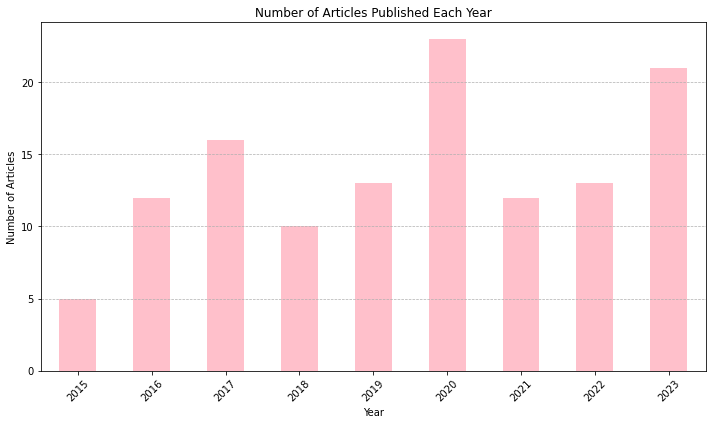

Publication_year
2015     5
2016    12
2017    16
2018    10
2019    13
2020    23
2021    12
2022    13
2023    21
dtype: int64

In [11]:
# Question 1: "How many articles are published each year, and is there a trend over time?"

import matplotlib.pyplot as plt

# Group the data by 'Publication_year' and count the number of articles per year
articles_per_year = df.groupby('Publication_year').size()

# Plot the number of articles published each year
plt.figure(figsize=(10, 6))
articles_per_year.plot(kind='bar', color='pink')
plt.title('Number of Articles Published Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

# Also, return the data for exact numbers
articles_per_year

In [12]:
import re

# clean the journal names
def clean_journal_name(journal_entry):
    # Remove DOI and any text following it
    journal_entry = re.sub(r'\. doi:.*', '', journal_entry)
    
    # Remove any trailing date information or other details after the journal name
    journal_entry = re.sub(r'\. \d{4}.*', '', journal_entry)
    
    # Remove any additional details that come after a period that are not part of the journal name
    journal_entry = re.sub(r'\..*', '', journal_entry)
    
    # Remove any text in parentheses or brackets at the end
    journal_entry = re.sub(r'[\(\[].*?[\)\]]', '', journal_entry)
    
    # Remove any remaining digits and punctuation at the end of the string
    journal_entry = re.sub(r'[\d\.,;:-]+\s*$', '', journal_entry)
    
    # Trim white spaces at the beginning and end
    journal_entry = journal_entry.strip()
    
    return journal_entry

# Apply the cleaning function to the 'Journal' column
df['Cleaned_Journal'] = df['Journal'].apply(clean_journal_name)

# Check the results
cleaned_journals = df['Cleaned_Journal'].value_counts()
cleaned_journals.head(10)

Artif Organs                          13
ACS Appl Mater Interfaces              7
ASAIO J                                6
J Biomed Mater Res B Appl Biomater     5
J Mater Chem B                         5
Sci Rep                                5
J Artif Organs                         4
Biomech Model Mechanobiol              4
Blood Purif                            4
J Biomed Mater Res A                   3
Name: Cleaned_Journal, dtype: int64

In [13]:
#Questions 3 Which affiliations or institutions have the highest number of publications?
import pandas as pd

# Concatenate all affiliation columns into a single Series
all_affiliations = pd.Series()
for i in range(1, max_affiliations_per_publication + 1):
    all_affiliations = all_affiliations.append(df[f'Affiliation_{i}'])

# Clean and standardize the affiliations, if necessary
# For example: trimming whitespace, converting to lowercase, etc.
# all_affiliations = all_affiliations.str.strip().str.lower()

# Count the frequency of each affiliation
affiliation_counts = all_affiliations.value_counts()

# Display the top affiliations
top_affiliations = affiliation_counts.head(10) 
top_affiliations


<ipython-input-13-ffc805f34e91>:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  all_affiliations = pd.Series()


No affiliations found                                                                                                                                                                                  4
1 Renal Unit, Ipswich Hospital, East Suffolk and North Essex Foundation Trust, Ipswich, UK.                                                                                                            2
1 Faculty of Mechanical and Material Engineering, Huaiyin Institute of Technology, Huai'an 223003, China                                                                                               2
1 Department of Pharmacy Practice, University of Findlay College of Pharmacy, Findlay, Ohio, USA                                                                                                       2
1 School of Engineering, Center for Biomedical Engineering, Institute for Molecular and Nanoscale Innovation, Brown University, 182 Hope St, Box D, Providence, RI 02912, United States of America. 

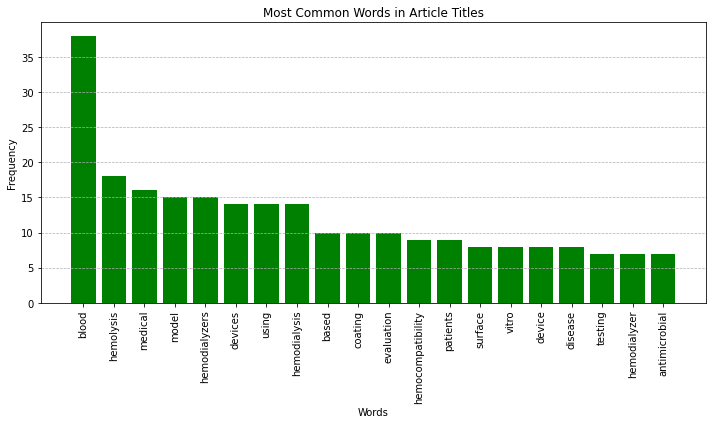

[('blood', 38),
 ('hemolysis', 18),
 ('medical', 16),
 ('model', 15),
 ('hemodialyzers', 15),
 ('devices', 14),
 ('using', 14),
 ('hemodialysis', 14),
 ('based', 10),
 ('coating', 10),
 ('evaluation', 10),
 ('hemocompatibility', 9),
 ('patients', 9),
 ('surface', 8),
 ('vitro', 8),
 ('device', 8),
 ('disease', 8),
 ('testing', 7),
 ('hemodialyzer', 7),
 ('antimicrobial', 7)]

In [16]:
# Questions 4: "What are the most common themes or keywords present in the article titles?"

from collections import Counter
import re

# Function to clean and tokenize text
def clean_tokenize(text):
    # Convert to lower case
    text = text.lower()
    # Remove punctuation and split into tokens
    tokens = re.findall(r'\b\w+\b', text)
    return tokens

# List of English stop words
stop_words = set([
    'the', 'and', 'of', 'in', 'a', 'to', 'with', 'for', 'on', 'by', 'an', 'as', 'at',
    'from', 'is', 'that', 'its', 'it', 'this', 'these', 'are', 'was', 'were', 'which', 'or'
])

# Tokenize the titles and remove stop words
titles = df['Title']
tokens = [word for title in titles for word in clean_tokenize(title) if word not in stop_words]

# Count the frequency of each word
word_counts = Counter(tokens)

# Get the most common words
most_common_words = word_counts.most_common(20)

# Plot the most common words
plt.figure(figsize=(10, 6))
plt.bar(*zip(*most_common_words), color='green')
plt.title('Most Common Words in Article Titles')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

# Return the most common words and their counts
most_common_words

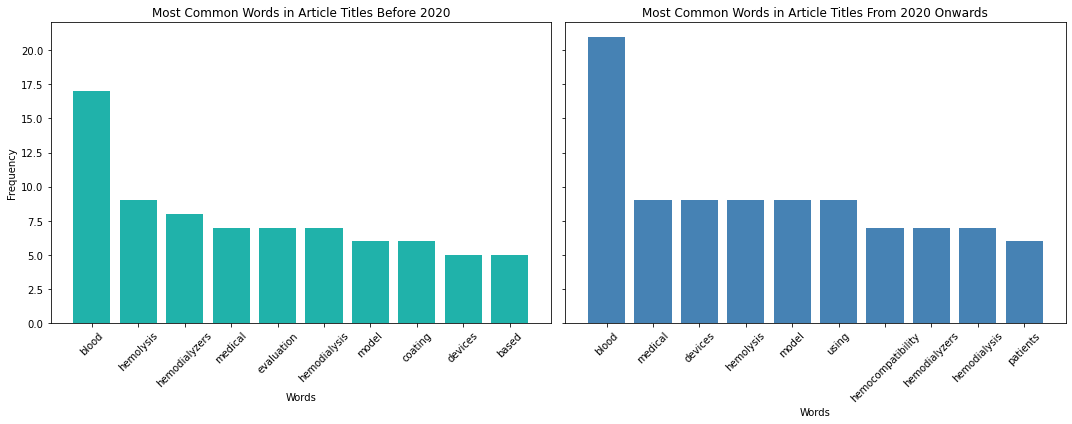

([('blood', 17),
  ('hemolysis', 9),
  ('hemodialyzers', 8),
  ('medical', 7),
  ('evaluation', 7),
  ('hemodialysis', 7),
  ('model', 6),
  ('coating', 6),
  ('devices', 5),
  ('based', 5)],
 [('blood', 21),
  ('medical', 9),
  ('devices', 9),
  ('hemolysis', 9),
  ('model', 9),
  ('using', 9),
  ('hemocompatibility', 7),
  ('hemodialyzers', 7),
  ('hemodialysis', 7),
  ('patients', 6)])

In [17]:
# Questions 5: "Are there emerging topics or trends in recent years?"


# perform the same analysis with the variable named 'df'
# Split the dataset into two time periods
before_2020_df = df[df['Publication_year'] < 2020]
from_2020_onwards_df = df[df['Publication_year'] >= 2020]

# Tokenize the titles and remove stop words for each period
tokens_before_2020_df = [word for title in before_2020_df['Title'] for word in clean_tokenize(title) if word not in stop_words]
tokens_from_2020_onwards_df = [word for title in from_2020_onwards_df['Title'] for word in clean_tokenize(title) if word not in stop_words]

# Count the frequency of each word for each period
word_counts_before_2020_df = Counter(tokens_before_2020_df)
word_counts_from_2020_onwards_df = Counter(tokens_from_2020_onwards_df)

# Get the most common words for each period
most_common_words_before_2020_df = word_counts_before_2020_df.most_common(10)
most_common_words_from_2020_onwards_df = word_counts_from_2020_onwards_df.most_common(10)

# Plot the most common words for each period
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Before 2020
axes[0].bar(*zip(*most_common_words_before_2020_df), color='lightseagreen')
axes[0].set_title('Most Common Words in Article Titles Before 2020')
axes[0].set_xlabel('Words')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', rotation=45)

# From 2020 onwards
axes[1].bar(*zip(*most_common_words_from_2020_onwards_df), color='steelblue')
axes[1].set_title('Most Common Words in Article Titles From 2020 Onwards')
axes[1].set_xlabel('Words')
# axes[1].set_ylabel('Frequency')  # Y-axis is shared, so no need to set again
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

(most_common_words_before_2020_df, most_common_words_from_2020_onwards_df)

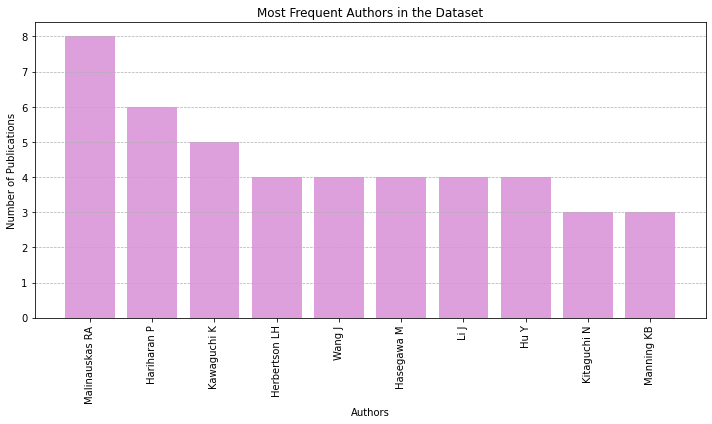

[('Malinauskas RA', 8),
 ('Hariharan P', 6),
 ('Kawaguchi K', 5),
 ('Herbertson LH', 4),
 ('Wang J', 4),
 ('Hasegawa M', 4),
 ('Li J', 4),
 ('Hu Y', 4),
 ('Kitaguchi N', 3),
 ('Manning KB', 3)]

In [22]:
# Most frequent Authors

# Function to clean and split author names
def clean_split_authors(author_string):
    # Split author names by comma, assuming each author is separated by a comma
    authors = author_string.split(',')
    # Remove any leading/trailing whitespace from each author name
    authors = [author.strip() for author in authors]
    return authors

# Combine all authors into a single list
all_authors = []
for authors in df['Authors'].dropna():
    all_authors.extend(clean_split_authors(authors))

# Count the occurrences of each author
author_counts = Counter(all_authors)

# Get the most common authors
most_common_authors = author_counts.most_common(10)

# Plot the most common authors
plt.figure(figsize=(10, 6))
plt.bar(*zip(*most_common_authors), color='plum')
plt.title('Most Frequent Authors in the Dataset')
plt.xlabel('Authors')
plt.ylabel('Number of Publications')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

# Return the most common authors and their counts
most_common_authors

In [23]:
import pandas as pd
from collections import Counter
import itertools

# Correcting the splitting of the 'Authors' column using a comma as the delimiter
author_lists = df['Authors'].str.split(',').dropna().tolist()

# Initialize an empty dictionary to store collaboration pairs and their counts
collaboration_counts = {}

# Loop through each list of authors
for authors in author_lists:
    # Trim whitespace and remove any trailing periods from author names
    authors_cleaned = [author.strip().rstrip('.') for author in authors]
    # Create unique pairs of authors for each publication
    for pair in itertools.combinations(authors_cleaned, 2):
        # Sort the pair to avoid duplicates (e.g., A-B and B-A are the same collaboration)
        sorted_pair = tuple(sorted(pair))
        # Count collaborations
        collaboration_counts[sorted_pair] = collaboration_counts.get(sorted_pair, 0) + 1

# Identify the most common collaborations
most_common_collaborations = Counter(collaboration_counts).most_common(10)

most_common_collaborations

[(('Kawaguchi K', 'Kitaguchi N'), 5),
 (('Hariharan P', 'Malinauskas RA'), 5),
 (('Herbertson LH', 'Malinauskas RA'), 4),
 (('Hasegawa M', 'Kitaguchi N'), 4),
 (('Kitaguchi N', 'Yuzawa Y'), 4),
 (('Hasegawa M', 'Kawaguchi K'), 4),
 (('Kawaguchi K', 'Yuzawa Y'), 4),
 (('Hasegawa M', 'Yuzawa Y'), 4),
 (("O'Rear EA", 'Papavassiliou DV'), 3),
 (('Craven BA', 'Herbertson LH'), 3)]

<ipython-input-24-cee2c2dec8d5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_affiliations['Publication_year'] = pd.to_numeric(df_with_affiliations['Publication_year'], errors='coerce')
<ipython-input-24-cee2c2dec8d5>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_affiliations['Publication_year'] = pd.to_numeric(df_no_affiliations['Publication_year'], errors='coerce')


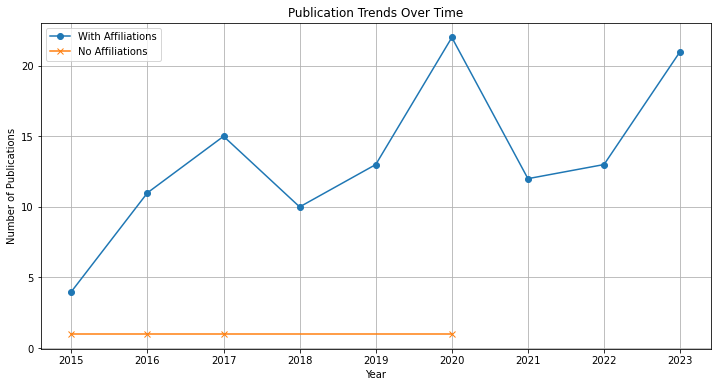

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a condition to check if all affiliation columns are empty or contain 'no affiliations found'
no_affiliations_condition = df['Affiliation_1'].str.lower().str.contains('no affiliations found')
for i in range(2, max_affiliations_per_publication + 1):
    no_affiliations_condition &= df[f'Affiliation_{i}'].str.lower().str.contains('no affiliations found', na=True)

# Separate the dataset into two subsets
df_with_affiliations = df[~no_affiliations_condition]
df_no_affiliations = df[no_affiliations_condition]

# Convert 'Publication_year' to numeric
df_with_affiliations['Publication_year'] = pd.to_numeric(df_with_affiliations['Publication_year'], errors='coerce')
df_no_affiliations['Publication_year'] = pd.to_numeric(df_no_affiliations['Publication_year'], errors='coerce')

# Group by publication year and count publications
pub_trends_with_affiliations = df_with_affiliations.groupby('Publication_year').size()
pub_trends_no_affiliations = df_no_affiliations.groupby('Publication_year').size()

# Plotting
plt.figure(figsize=(12, 6))
pub_trends_with_affiliations.plot(label='With Affiliations', marker='o')
pub_trends_no_affiliations.plot(label='No Affiliations', marker='x')
plt.title('Publication Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.legend()
plt.grid(True)
plt.show()